# Loan Prediction
https://medium.com/datadriveninvestor/data-analysis-with-python-part-3-4c13aab3267c




In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
df = pd.read_csv(r'C:\Users\hai\Documents\notebook\data\train_loanPrediction.csv')

# df['ApplicantIncome'] = df['ApplicantIncome'] 
# df['CoapplicantIncome'] = df['CoapplicantIncome'] 
# df['LoanAmount'] = df['LoanAmount'] 

In [27]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df.count(axis=0)

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

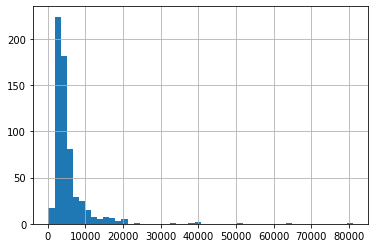

In [29]:
# distribution list
df['ApplicantIncome'].hist(bins=50)

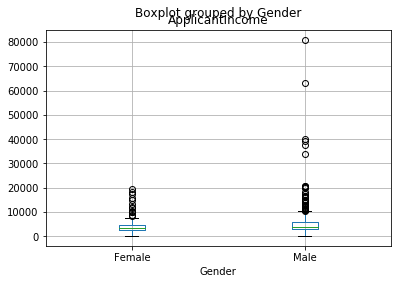

In [30]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

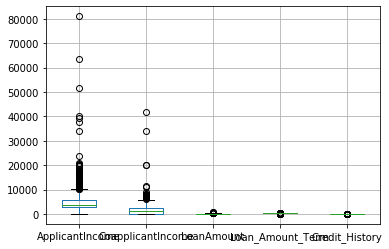

In [31]:
df.plot.box(grid=True)

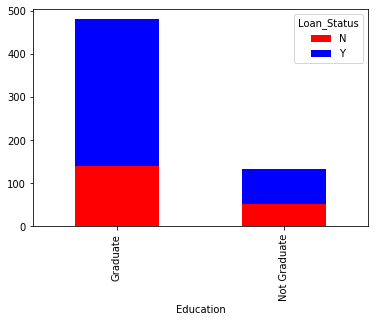

In [32]:
# categorical variable analysis like gender education
## distribution of loan status vs education, married and credit history
t1 = pd.crosstab(df['Education'], df['Loan_Status'])
t1.plot(kind='bar', stacked=True, grid=False, color = ['red', 'blue'])

In [33]:
# count missing data in each column
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df.groupby('ApplicantIncome').mean()[:5]


,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,,,,
150,1800.0,135.0,360.0,1.0
210,2917.0,98.0,360.0,1.0
416,41667.0,350.0,180.0,NaN
645,3683.0,113.0,480.0,1.0
674,5296.0,168.0,360.0,1.0


In [35]:
df.groupby('Married').get_group('Yes')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [36]:
print("mean is: ",df['ApplicantIncome'].mean())
print("median is: ",df['ApplicantIncome'].median())
print("mode is: ",df['ApplicantIncome'].mode())

mean is:  5403.459283387622
median is:  3812.5
mode is:  0    2500
dtype: int64


In [37]:
print("standard deviation is: ",df['ApplicantIncome'].std())
print("variance is: ",df['ApplicantIncome'].var())
print("skewness is: ",df['ApplicantIncome'].skew())

standard deviation is:  6109.041673387174
variance is:  37320390.167181164
skewness is:  6.539513113994625


for p-value<0.05 we reject the null hypothesis that there’s no difference between the means and conclude that a significant difference does exist.

In [38]:
##using scipy
stats.ttest_ind(df['ApplicantIncome'],df['CoapplicantIncome'])

Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)

# correlation
### Correlation coefficient measures the strength and direction of a linear relationship between two variables. 

### A positive covariance/correlation means that the two variables at hand are positively related, and they move in the same direction. A negative covariance /correlation means that the variables are inversely related, or that they move in opposite directions.Range(-1 to 1)

## -1 means perfect downhill negative linearrelationship, 0.30 weak downhill (negative) linear relationship
## 0 means no linear relationship
## +1 means perfect uphill positive linear relationship and so on

In [40]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# chi-square test
### The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution. It’s typically used with categorical data such as educational attainment, colors, or gender.
### It returns vales of chi-square statistic,p-values and degree of freedom along with contingency table.

In [41]:
print(stats.chisquare(df['Education'].value_counts()))
print(stats.chisquare(df['Loan_Status'].value_counts()))
cont = pd.crosstab(df['Education'],df['Loan_Status'])
stats.chi2_contingency(cont)

Power_divergenceResult(statistic=194.97719869706842, pvalue=2.6060806622869675e-44)
Power_divergenceResult(statistic=86.15635179153094, pvalue=1.6625705362253795e-20)


(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

# Linear Regression


[[1596.36059951]
 [1667.07167068]
 [1755.4884366 ]
 [1778.77952402]
 [1587.92665658]]


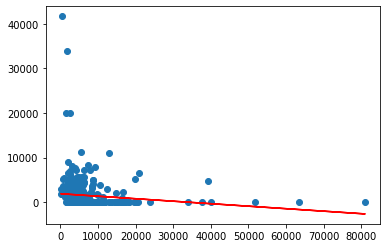

In [42]:
from sklearn.linear_model import LinearRegression
X = np.array(df['ApplicantIncome']).reshape(-1,1)
Y = np.array(df['CoapplicantIncome']).reshape(-1,1)
linear_regressor=LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
print(Y_pred[:5])
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()